Each month the Bureau of Labor Statistics in the U.S. Department of Labor conducts the “Current Population Survey” (CPS), which provides data on labor force characteristics of the population, including the level of employment, unemployment, and earnings. Approximately 65,000 randomly selected U.S. households are surveyed each month. The sample is chosen by randomly selecting addresses from a database comprised of addresses from the most recent decennial census augmented with data on new housing units constructed after the last census. The exact random sampling scheme is rather complicated (first small geographical areas are randomly selected, then housing units within these areas randomly selected); details can be found in the Handbook of Labor Statistics and is described on the Bureau of Labor Statistics website.

The survey conducted each March is more detailed than in other months and asks questions about earnings during the previous year. The file CPS92_08 contains the data for 1992 and 2008 (from the March 1993 and 2009 surveys). These data are for full-time workers, defined as workers employed more than 35 hours per week for at least 48 weeks in the previous year. Data are provided for workers whose highest educational achievement is (1) a high school diploma, and (2) a bachelor’s degree.


the CPS12 dataset. This is E8.2 in the Updated Edition (which I have put on CourseSpaces for users of the Third Edition).

In [1]:
library(haven)
library(dplyr)
library(visreg)
cps12 <- read_dta("https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/cps12.dta")
glimpse(cps12)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 7,440
Variables: 5
$ year     <dbl> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012...
$ ahe      <dbl> 19.230770, 17.548077, 8.547009, 16.826923, 16.346153, 16.1...
$ bachelor <dbl> 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...
$ female   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1...
$ age      <dbl> 30, 29, 27, 25, 27, 30, 31, 29, 29, 33, 27, 28, 30, 31, 34...


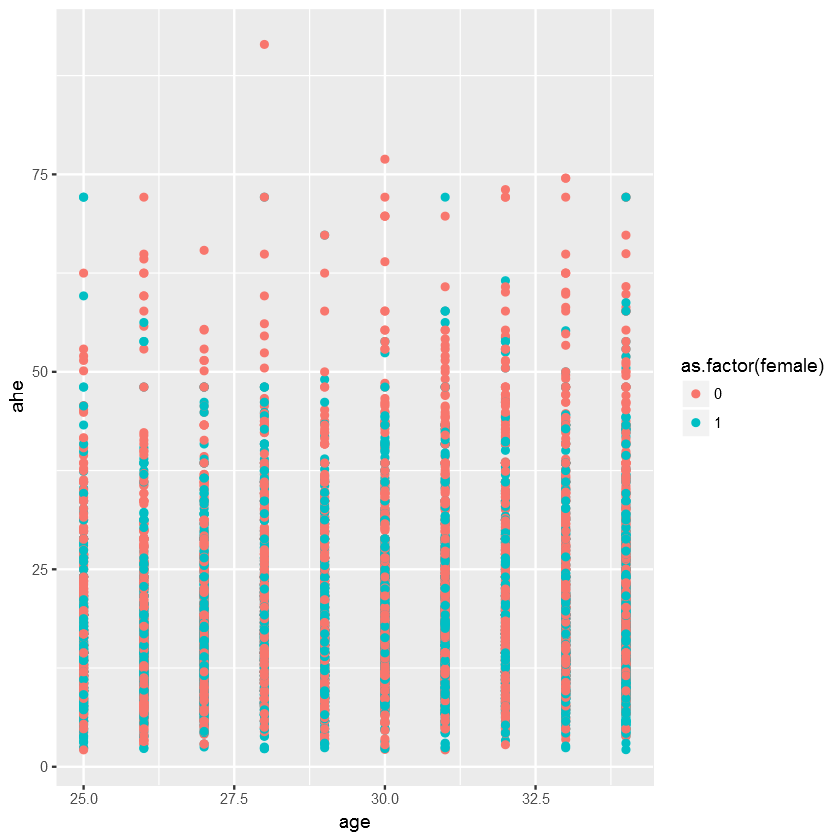

In [3]:
library(ggplot2)
p= ggplot(data = cps12, mapping = aes(x=age  , y=ahe, color = as.factor(female))) 
p+ geom_point()

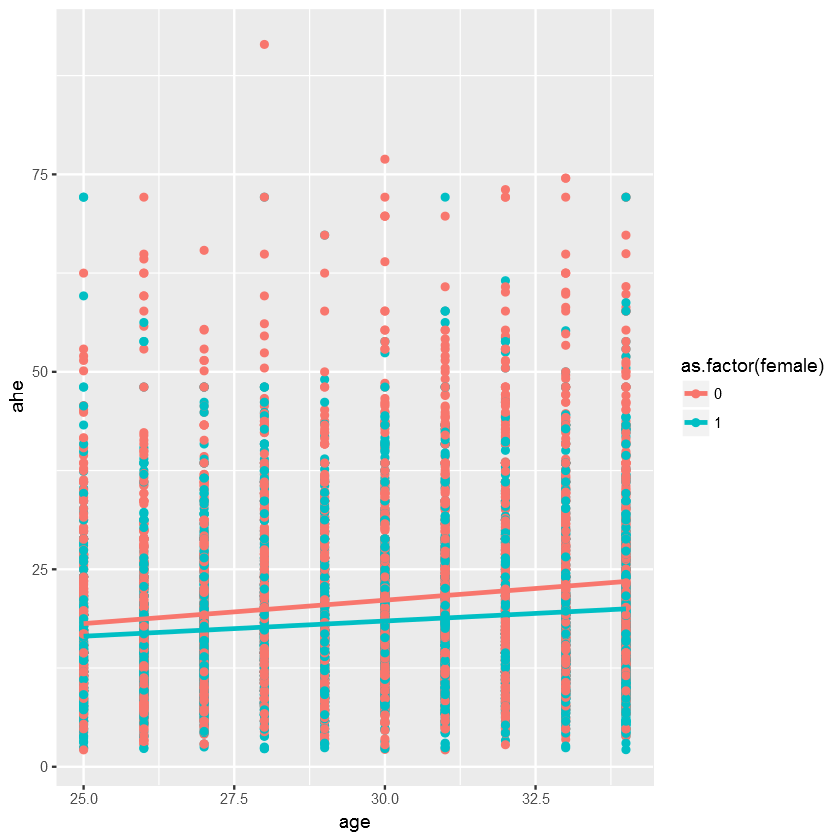

In [4]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

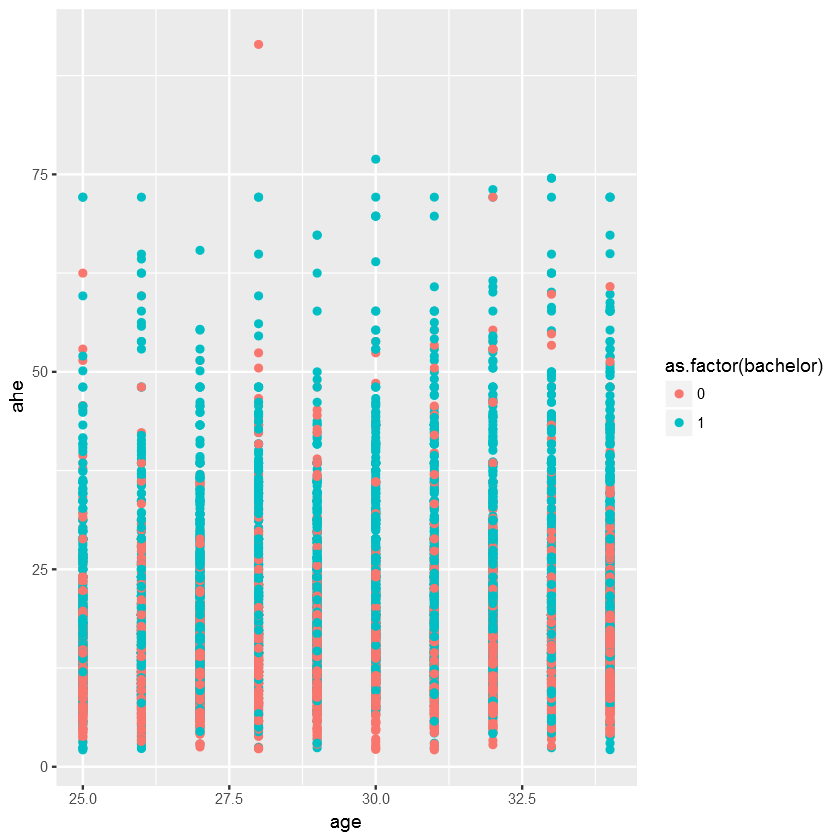

In [5]:
library(ggplot2)
p= ggplot(data = cps12, mapping = aes(x=age  , y=ahe, color = as.factor(bachelor))) 
p+ geom_point()

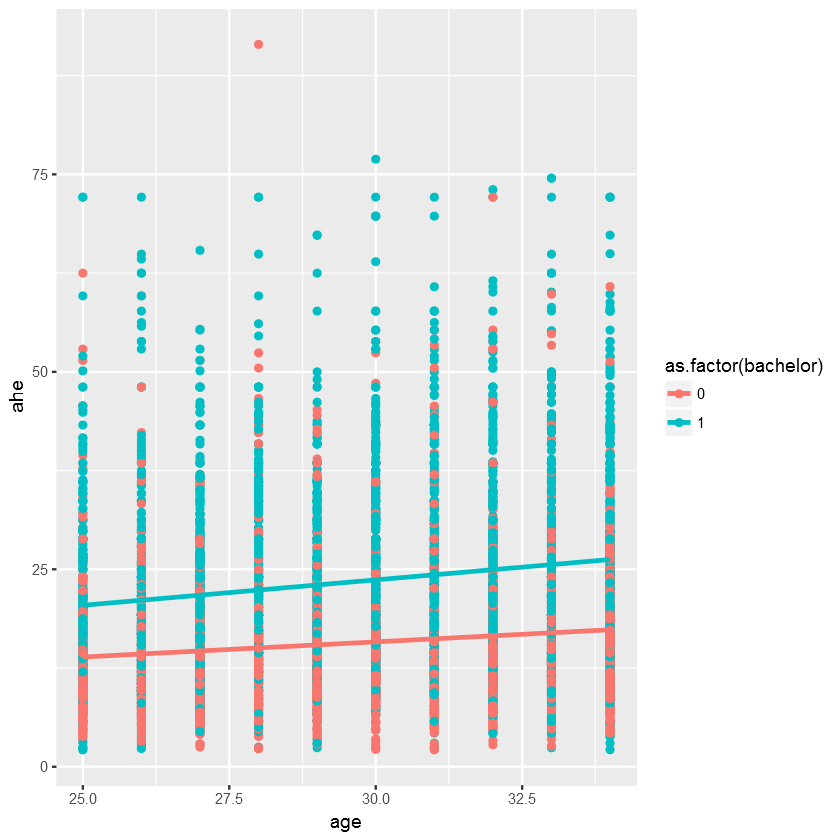

In [6]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

In [7]:
model1 <- lm(ahe~age+female+ bachelor,data = cps12)
summary(model1)


Call:
lm(formula = ahe ~ age + female + bachelor, data = cps12)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.688  -6.207  -1.708   4.280  75.302 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.86620    1.18760   1.571    0.116    
age          0.51029    0.03952  12.912   <2e-16 ***
female      -3.81030    0.22960 -16.596   <2e-16 ***
bachelor     8.31863    0.22739  36.584   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.678 on 7436 degrees of freedom
Multiple R-squared:  0.1801,	Adjusted R-squared:  0.1798 
F-statistic: 544.5 on 3 and 7436 DF,  p-value: < 2.2e-16


In [8]:
model2 <- lm(log(ahe)~age+female+ bachelor,data = cps12)
summary(model2)


Call:
lm(formula = log(ahe) ~ age + female + bachelor, data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28277 -0.28680  0.01372  0.30939  1.85993 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.941423   0.058683   33.08   <2e-16 ***
age          0.025518   0.001953   13.07   <2e-16 ***
female      -0.192338   0.011345  -16.95   <2e-16 ***
bachelor     0.437783   0.011236   38.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4782 on 7436 degrees of freedom
Multiple R-squared:  0.1964,	Adjusted R-squared:  0.1961 
F-statistic: 605.7 on 3 and 7436 DF,  p-value: < 2.2e-16


In [9]:
model3 <- lm(log(ahe)~log(age)+female+ bachelor,data = cps12)
summary(model3)


Call:
lm(formula = log(ahe) ~ log(age) + female + bachelor, data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27827 -0.28691  0.01326  0.30992  1.85737 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14953    0.19436   0.769    0.442    
log(age)     0.75294    0.05734  13.132   <2e-16 ***
female      -0.19236    0.01134 -16.957   <2e-16 ***
bachelor     0.43766    0.01123  38.957   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4782 on 7436 degrees of freedom
Multiple R-squared:  0.1966,	Adjusted R-squared:  0.1962 
F-statistic: 606.4 on 3 and 7436 DF,  p-value: < 2.2e-16


In [12]:
model4 <- lm(log(ahe)~I(age^2)+female+ bachelor,data = cps12)
summary(model4)


Call:
lm(formula = log(ahe) ~ I(age^2) + female + bachelor, data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28700 -0.28961  0.01508  0.31118  1.86210 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.318e+00  3.073e-02   75.43   <2e-16 ***
I(age^2)     4.285e-04  3.301e-05   12.98   <2e-16 ***
female      -1.923e-01  1.135e-02  -16.95   <2e-16 ***
bachelor     4.379e-01  1.124e-02   38.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4783 on 7436 degrees of freedom
Multiple R-squared:  0.1961,	Adjusted R-squared:  0.1958 
F-statistic: 604.8 on 3 and 7436 DF,  p-value: < 2.2e-16


In [13]:
model5 <- lm(log(ahe)~I(age^2)+female+ bachelor + I(female* bachelor),data = cps12)
summary(model5)


Call:
lm(formula = log(ahe) ~ I(age^2) + female + bachelor + I(female * 
    bachelor), data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30760 -0.28878  0.01579  0.31379  1.84499 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.334e+00  3.096e-02  75.373  < 2e-16 ***
I(age^2)              4.300e-04  3.298e-05  13.038  < 2e-16 ***
female               -2.423e-01  1.701e-02 -14.238  < 2e-16 ***
bachelor              4.010e-01  1.463e-02  27.402  < 2e-16 ***
I(female * bachelor)  8.978e-02  2.282e-02   3.935  8.4e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4778 on 7435 degrees of freedom
Multiple R-squared:  0.1978,	Adjusted R-squared:  0.1974 
F-statistic: 458.4 on 4 and 7435 DF,  p-value: < 2.2e-16







The datafile Lead_Mortality contains data on 172 U.S. cities in 1900. These data were provided
by Professor Karen Clay of Carnegie Mellon University and are a subset of the data used in her
paper with Werner Troesken and Michael Haines “Lead and Mortality,” Review of Economics
and Statistics, 2014. 



https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Lead_Mortality_Description.pdf



In [80]:
library(haven)
library(dplyr)
library(visreg)
lead <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/data3eu/lead_mortality.dta")
glimpse(lead)

Observations: 172
Variables: 15
$ year          <dbl> 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,...
$ city          <chr> "Alameda", "Albany", "Allegheny", "Allentown", "Altoo...
$ state         <chr> "CA", "NY", "PA", "PA", "PA", "NY", "MI", "GA", "NJ",...
$ age           <dbl> 28.95484, 30.34768, 27.08730, 27.76405, 27.03753, 28....
$ hardness      <dbl> 97, 43, 111, 176, 111, 43, 269, 15, 12, 120, 9, 47, 9...
$ ph            <dbl> 7.6, 7.3, 7.3, 7.7, 7.3, 7.3, 8.0, 6.8, 6.2, 6.8, 6.9...
$ infrate       <dbl> 0.1097561, 0.2986185, 0.4468413, 0.3841808, 0.4678663...
$ typhoid_rate  <dbl> 0.024390243, 0.041445270, 0.093990758, 0.028248588, 0...
$ np_tub_rate   <dbl> 0.030487806, 0.013815090, 0.027734976, 0.005649718, 0...
$ mom_rate      <dbl> 0.1951219, 0.1795962, 0.1926040, 0.1977401, 0.1825193...
$ population    <dbl> 164, 941, 1298, 354, 389, 209, 145, 898, 278, 303, 11...
$ precipitation <dbl> 1.850307, 3.278735, 3.350943, 3.350943, 3.350943, 3.2...
$ temperature   <dbl

In [81]:
#http://stackoverflow.com/questions/26581410/dplyr-summarizing-count-and-conditional-aggregate-functions-on-the-same-factor

lead  %>% mutate(infrate=as.numeric(as.character(infrate)), lead = as.factor(lead)) %>%
   group_by(lead) %>% summarise(avg.infrate=mean(infrate,na.rm=TRUE))



lead,avg.infrate
0,0.3811679
1,0.4032576


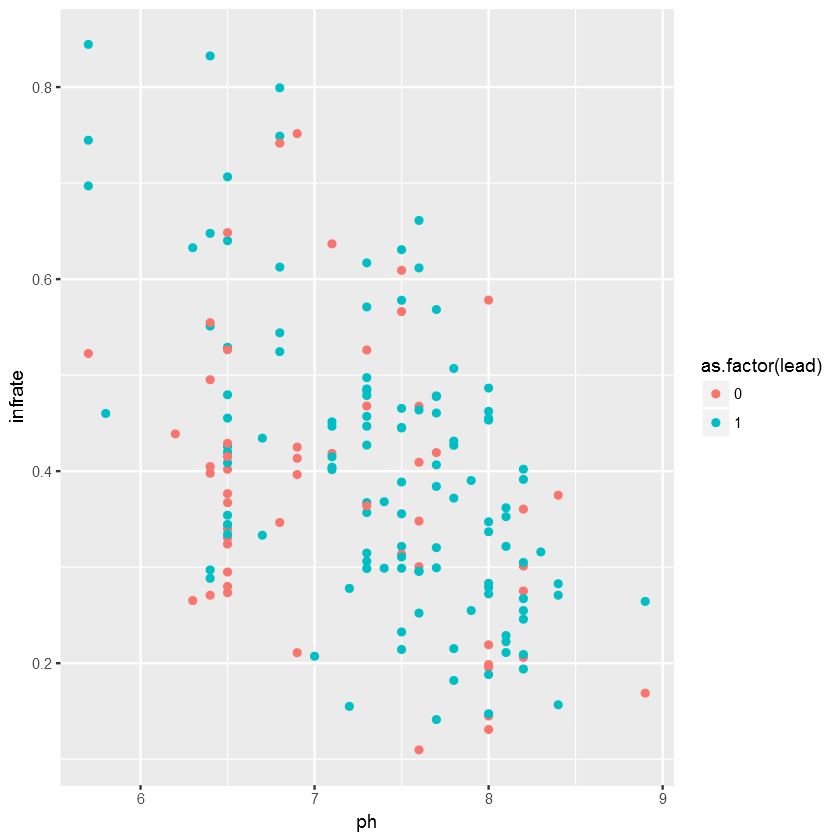

In [87]:
library(ggplot2)
p= ggplot(data = lead, mapping = aes(x=ph  , y=infrate, color = as.factor(lead))) 
p+ geom_point()

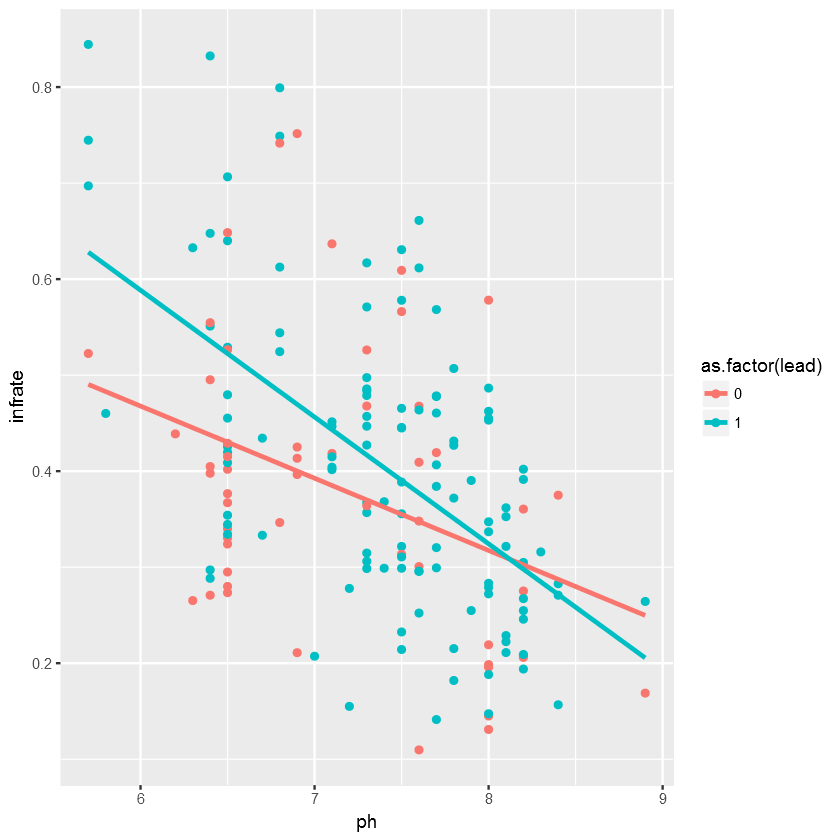

In [88]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

# , se = FALSE

In [82]:
t.test(formula = lead$infrate ~ lead$lead)


	Welch Two Sample t-test

data:  lead$infrate by lead$lead
t = -0.90387, df = 109.29, p-value = 0.3681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07052551  0.02634606
sample estimates:
mean in group 0 mean in group 1 
      0.3811679       0.4032576 


In [83]:
t.test(lead$infrate[lead$lead== 0], lead$infrate[lead$lead== 1], "g", 1, FALSE, TRUE, 0.95)


	Two Sample t-test

data:  lead$infrate[lead$lead == 0] and lead$infrate[lead$lead == 1]
t = -41.289, df = 170, p-value = 1
alternative hypothesis: true difference in means is greater than 1
95 percent confidence interval:
 -0.06303082         Inf
sample estimates:
mean of x mean of y 
0.3811679 0.4032576 


In [84]:


mean(lead$infrate[lead$lead== 1])


[1] 0.4032576

In [93]:
#p307 version4
model1 <- lm(infrate~lead+ph+I(lead*ph),data = lead)
summary(model1)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [115]:
#http://drewdimmery.com/robust-ses-in-r/
#heteroskedasticity robust standard errors in R. In Stata, this is trivially easy: you simply add “, robust” to the end of your regression command (or , cluster(var) for cluster robust SEs). In R, there’s a bit more flexibility, but this comes at the cost of a little added complication. Simplest first.
require("sandwich")
require("lmtest")
model1$newse<-vcovHC(model1)
coeftest(model1,model1$newse)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.918904   0.155541  5.9078 1.876e-08 ***
lead          0.461798   0.213727  2.1607   0.03214 *  
ph           -0.075179   0.021689 -3.4663   0.00067 ***
I(lead * ph) -0.056862   0.028940 -1.9648   0.05108 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [100]:
#library(AER)
library(car)
linearHypothesis(model1,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
170,NA,NA,NA
168,2,3.936032,0.02135224


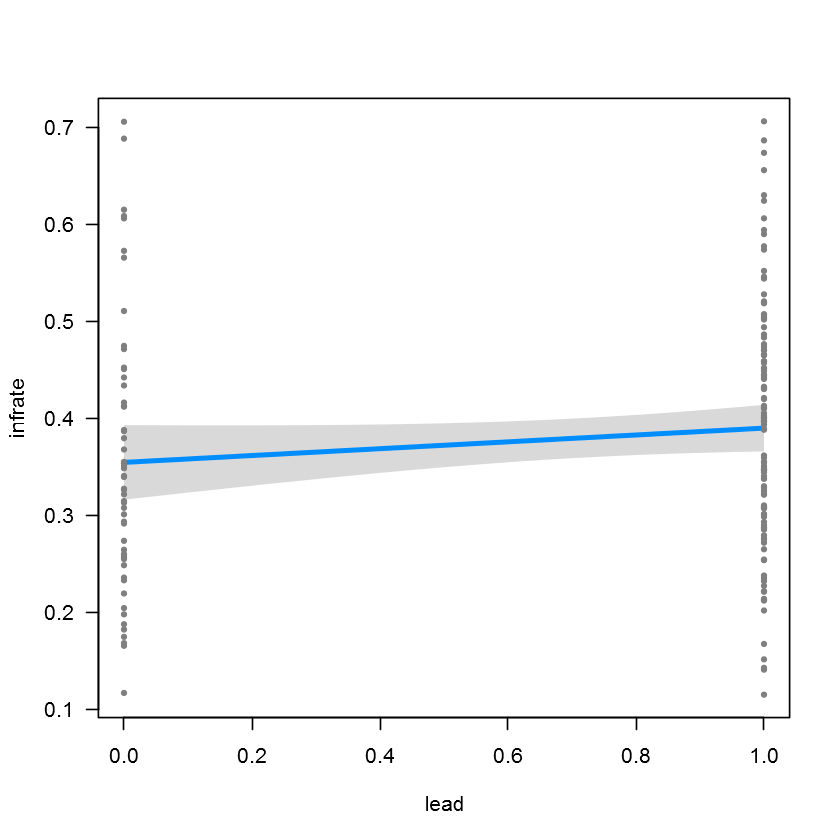

In [101]:
visreg(model1, "lead", type="conditional")

In [105]:
model2 <- lm(infrate~ lead +ph+I(lead*ph)+mom_rate+np_tub_rate+typhoid_rate,data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + mom_rate + 
    np_tub_rate + typhoid_rate, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.257169 -0.082441 -0.008178  0.085858  0.301600 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.76666    0.17964   4.268 3.32e-05 ***
lead          0.52205    0.21119   2.472 0.014454 *  
ph           -0.07123    0.02318  -3.073 0.002479 ** 
I(lead * ph) -0.06545    0.02900  -2.257 0.025334 *  
mom_rate      0.13247    0.29744   0.445 0.656630    
np_tub_rate   2.33233    0.80444   2.899 0.004249 ** 
typhoid_rate  1.25344    0.33841   3.704 0.000289 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1239 on 165 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3301 
F-statistic: 15.04 on 6 and 165 DF,  p-value: 1.069e-13


In [106]:
linearHypothesis(model2,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
167,NA,NA,NA
165,2,4.724529,0.01011028


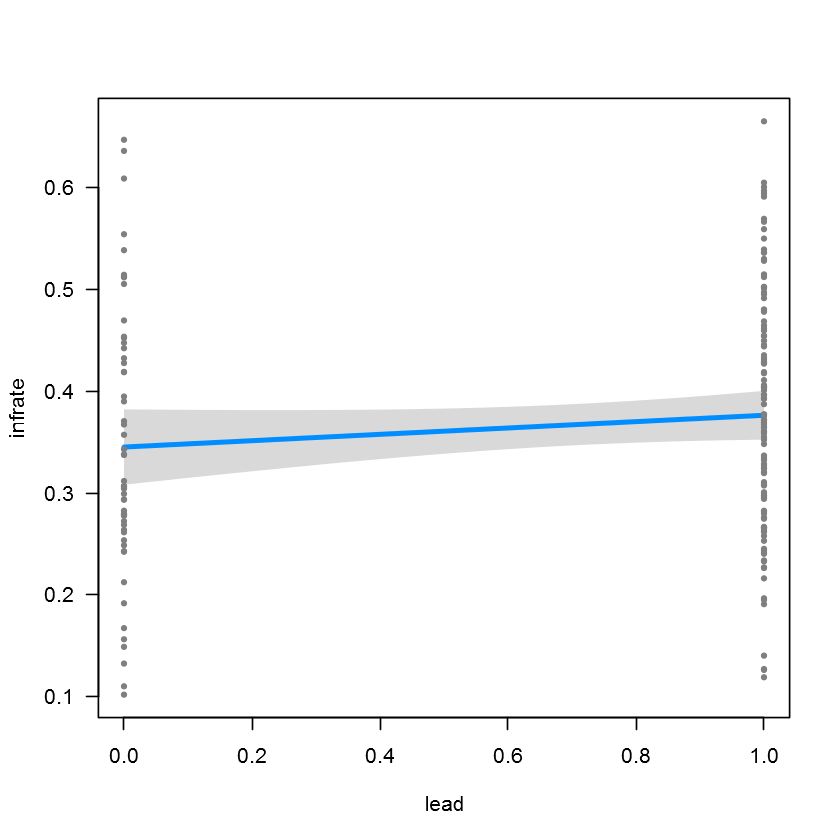

In [107]:
visreg(model2, "lead", type="conditional")

In [112]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+np_tub_rate+typhoid_rate+hardness+precipitation+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + np_tub_rate + 
    typhoid_rate + hardness + precipitation + temperature, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298122 -0.081011 -0.008036  0.078393  0.312767 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2124983  0.1989007   1.068 0.286936    
lead           0.4537721  0.2014461   2.253 0.025621 *  
ph            -0.0355440  0.0249430  -1.425 0.156066    
I(lead * ph)  -0.0551874  0.0276446  -1.996 0.047565 *  
np_tub_rate    2.0134319  0.7657999   2.629 0.009378 ** 
typhoid_rate   0.9341702  0.3308150   2.824 0.005337 ** 
hardness      -0.0001632  0.0001099  -1.485 0.139521    
precipitation  0.0727929  0.0197722   3.682 0.000315 ***
temperature    0.0022263  0.0020193   1.102 0.271883    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1164 on 163 degrees of freedom
Multiple R-squared:  0.4357,	Ad

In [113]:
linearHypothesis(model4,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
165,NA,NA,NA
163,2,4.410415,0.01363362


In [ ]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+hardness+precipitation+temperature,data = lead)
summary(model3)

In [92]:
model2 <- lm(infrate~ lead+ph+I(lead*ph),data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [90]:
mean(lead$ph)

[1] 7.322674

In [91]:
model3 <- lm(infrate~ as.factor(lead)+ph+I(lead*ph)+population+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ as.factor(lead) + ph + I(lead * ph) + 
    population + temperature, data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30337 -0.09061 -0.00859  0.07073  0.40042 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.736e-01  1.818e-01   3.705 0.000288 ***
as.factor(lead)1  3.485e-01  2.165e-01   1.609 0.109417    
ph               -8.844e-02  2.376e-02  -3.723 0.000270 ***
I(lead * ph)     -4.221e-02  2.973e-02  -1.420 0.157560    
population        1.821e-06  3.109e-06   0.586 0.558703    
temperature       6.971e-03  1.922e-03   3.626 0.000382 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.126 on 166 degrees of freedom
Multiple R-squared:  0.3266,	Adjusted R-squared:  0.3063 
F-statistic:  16.1 on 5 and 166 DF,  p-value: 6.275e-13
